# Least Squares (Linear) Regression

- From [this Least Squares example](https://github.com/SergioRAgostinho/bootstrap-ml/blob/master/least_squares.ipynb) Notebook.
    - Author:  [Sérgio Agostinho](https://www.linkedin.com/in/sergioagostinho)
    - [Sérgio's GitHub repository](https://github.com/SergioRAgostinho/bootstrap-ml)

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.

This was made from the [Bootstrap-ML](http://sergioagostinho.com/bootstrap-ml) workshop which took place on the 22nd of March 2018 at the Mathematics Department of [Instituto Superior Técnico](https://tecnico.ulisboa.pt/en/).

This workshop, given by Sérgio Agostinh, was a two-hour introductory session in Machine Learning (ML).

## Introduction

We're going to tackle one of the most simple and yet powerful tool of Machine Learning, the Least Squares estimator. Given a function in the shape of 

\begin{equation}
\hat y = w^T\Phi\left(x\right) + b \label{linear}
\end{equation}

where $\hat y, b \in \mathbb{R}$ and $\Phi$ is a mapping from our input space to a given feature space such that $\Phi: \mathbb{R}^m \to \mathbb{R}^n$, we want to estimate the optimal $w$ which minimizes

\begin{equation}
e = \sum^{N}_{i = 1} \left(y - \hat y\right)^2 \label{sse}
\end{equation}

## Problem: fit the a straight line through a number of points

This is the most basic and common use case, so we need to see it in action. Let's generate a number of random points between $\left[0, 1\right]$ according to the following model

\begin{equation}
y = 2x + 1 + e
\end{equation}

where $e \sim \mathcal{N} \left(0, 0.2^2\right)$. In this case $w \in \mathbb{R}$ and is equal to $2$, $x \in \mathcal{U} \left(0, 1\right)$ and $b=1$


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math


n = 100
x = np.random.uniform(size=n)
e = np.random.normal(scale=0.4, size=n)
y = 2*x + 1 + e

#
plt.scatter(x=x, y=y)
plt.show()


In [ ]:
x

In [ ]:
y

### How to find the best $w$ and $b$?

Let's derive this one time so that you understand the most basic concepts of all these algorithms. We are interested in finding the weight vector $w$ which minimizes the sum of the square error

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \Phi(x_i) - b \right)^2 
\end{equation}

We can augment $w$ such that $w_0 = b$ and $w \in \mathbb{R}^{n+1}$ and rerite the expression above as

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 
\end{equation}


Since the equation is linear, it has a closed-form solution. Let's start by finding the $w$ which gives as a null gradient. We're also going to make use of an important property of matrix derivatives, in this case applied to vectors

\begin{equation}
\frac{d x^Ta}{dx} =  a
\end{equation}

for $a, x \in \mathbb{R}^n$.

\begin{eqnarray}
\frac{d}{dw} \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2  & = & 0 \\
\sum^{N}_{i = 1} \frac{d}{dw} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 & = & 0 \\
\sum^{N}_{i = 1} -2 \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(\left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w - y_i\right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i)\Phi(x_i)^T & \Phi(x_i) \\ \Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
 \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right] w & = & \left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]
\end{eqnarray}

resulting of course in

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Let's apply this proof to our case. First we need to figure what is what. We know the data was generated under the following model

\begin{equation}
y = 2x + 1
\end{equation}

plus some added noise. In this case the $\Phi(x) = x$, $w = 2$ and $b = 1$.



## Numpy [linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

We have a handy function available that solves exactly this kind of system, but we had to do a lot of math first.

In [ ]:
X = np.array([[np.dot(x, x), np.sum(x)],[np.sum(x), n]])
Y = np.array([np.dot(x,y), np.sum(y)])
theta = np.linalg.solve(X,Y)
print(theta)

In [ ]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, theta[0]*x + theta[1], 'r', label='fitted line')
plt.legend()
plt.show()

## Scikit Learn [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

Scikit already provides linear regression capabilities among others. So everything we went through could have been replaced by:

In [ ]:
import sklearn
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Note that we needed to use [numpy reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) here so that our inputs to the fit function are a 2D matix 

See [this example for more on using sklearn linear models](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [ ]:
print(f"x's shape was {y.shape}")
print(f"x is reshaped to {x.reshape(-1,1).shape}")
print(f"y's shape is {y.shape}")
print("--So for each entry in Y we have an input vector in X containing exactly one item.")

## Bonus math

If you haven't had enough, feel free to note this nice equivalence in linear algebra using normal equations.

### Normal Equations

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i)^T \\ \sum^{N}_{i = 1} \Phi(x_i) & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Can be written in another way commonly know as the **normal equations**. Just like before, consider you have $N$ samples and you stack your features and your target like this

\begin{equation}
X =  \left[\begin{matrix}\Phi(x_1)^T & \dots  & 1 \\
                         \vdots    & \ddots & \vdots \\
                         \Phi(x_N)^T & \dots  & 1 \end{matrix}\right]
\end{equation}

\begin{equation}
\textbf{y} =  \left[\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right]
\end{equation}


The best $w$ is given by

\begin{equation}
\hat{w} = (X^TX)^{-1} X^T  \textbf{y}
\end{equation}

Let's test it.

In [ ]:
X = np.matrix([x, np.ones(len(x))]).T
Y = np.matrix(y).T
print("X shape:\n", X.shape)
print("Y shape:\n", Y.shape)

w = np.linalg.solve(X.T * X, X.T * Y)
print("w:\n", w)

## Bonus LinearRegression Example

- [This example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) is pulled directly from the scikit-learn examples, and lightly edited to descr



In [21]:
# Get the dataset and segment it into training and test sets.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print(f"- Available features are : {diabetes.feature_names}")

- Available features are : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [34]:
# Use only one feature,
feature = 2
print(f'- Using only feature #{feature} which is "{diabetes.feature_names[feature]}"')
diabetes_X = diabetes.data[:, np.newaxis, feature]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

- Using only feature #2 which is "bmi"


In [35]:
# Build and train the model.

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


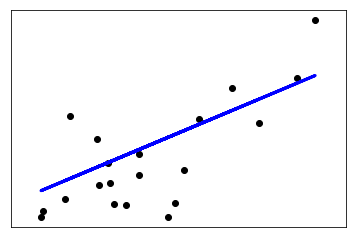

In [36]:
# Display the results.

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Explore the Diabetes data set

Take a closer look that the content of the dataset using Pandas.

In [5]:
ds = diabetes
print(ds.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [6]:
ds

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
import pandas as pd
X = pd.DataFrame(ds['data'], columns=ds['feature_names'])
Y = pd.DataFrame(ds['target'], columns=['target'])

df = pd.DataFrame(np.c_[ds['data'], ds['target']],
                  columns= np.append(ds['feature_names'], ['target']))
df

### End of notebook.